# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Шаг-1-Заполнение-пропусков" data-toc-modified-id="Шаг-1-Заполнение-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Шаг 1 Заполнение пропусков</a></span></li><li><span><a href="#Шаг-2.-Изменение-типов-данных" data-toc-modified-id="Шаг-2.-Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Шаг 2. Изменение типов данных</a></span></li><li><span><a href="#Шаг-3-Дубликаты" data-toc-modified-id="Шаг-3-Дубликаты-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Шаг 3 Дубликаты</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Задача-1." data-toc-modified-id="Задача-1.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Задача 1.</a></span></li><li><span><a href="#Задача-2" data-toc-modified-id="Задача-2-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Задача 2</a></span></li><li><span><a href="#Задача-3" data-toc-modified-id="Задача-3-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Задача 3</a></span></li><li><span><a href="#Задача-4" data-toc-modified-id="Задача-4-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Задача 4</a></span></li><li><span><a href="#Задача-5" data-toc-modified-id="Задача-5-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Задача 5</a></span></li><li><span><a href="#Задача-6" data-toc-modified-id="Задача-6-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Задача 6</a></span></li><li><span><a href="#Задача-7" data-toc-modified-id="Задача-7-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Задача 7</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

Описание данных:

*	airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
*	balcony — число балконов
*	ceiling_height — высота потолков (м)
*	cityCenters_nearest — расстояние до центра города (м)
*	days_exposition — сколько дней было размещено объявление (от публикации до снятия)
*	first_day_exposition — дата публикации
*	floor — этаж
*	floors_total — всего этажей в доме
*	is_apartment — апартаменты (булев тип)я
*	kitchen_area — площадь кухни в квадратных метрах (м²)
*	last_price — цена на момент снятия с публикации
*	living_area — жилая площадь в квадратных метрах (м²)
*	locality_name — название населённого пункта
*	open_plan — свободная планировка (булев тип)
*	parks_around3000 — число парков в радиусе 3 км
*	parks_nearest — расстояние до ближайшего парка (м)
*	ponds_around3000 — число водоёмов в радиусе 3 км
*	ponds_nearest — расстояние до ближайшего водоёма (м)
*	rooms — число комнат
*	studio — квартира-студия (булев тип)
*	total_area — площадь квартиры в квадратных метрах (м²)
*	total_images — число фотографий квартиры в объявлении

## Изучение данных из файла

Подробно разберём, какие в df столбцы и какую информацию они содержат:

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# чтение файла с данными с сохранением в df
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
# получение первых 10 строк таблицы df
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# получение общей информации о данных в таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
# суммарное количество пропусков, выявленных методом isna() в таблице df
df.isna().sum()   

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Вывод

При первичном анализе данных были выявлены следующие проблемы и возможные причины их появления:

* `first_day_exposition` - тип object - должен быть тип datetime

* `ceiling_height` - нулевые значения

* ceiling_height - довольно важная информация, но она отсуствует. Предполагаю, что некоторые не считают эту информацию обязательной к  для заполнению. Можно заполнить пропуски средним показателем ceiling_height по населенному пункту.*

* `floors_total` - должен быть тип int, т.к. количество этажей - целое значение + присутствуют нулевые значения

*данные могут отсутствать по причине необязательности заполнения этих столбцов.*

* `is_apartment` - должен быть тип bool + нулевые значения.

*Скорее всего NaN значения предполагают ответ - "0", т.е. это не апартаменты. Заполним пропущенные значения 0*

* `living_area` - нулевые значения
* `kitchen_area` - нулевые значения

*данные, которые могут быть не заполнены просто по той причине, что они необязательны к заполнению, а высчитывать жилую площадь/площадь некому.*

* `balcony` - тип должен быть int + нулевые значения

*Так же как и со столбцом `is_apartment`, предположем, что NaN - это там, где балкона нет и заполним эти пропуски 0.* 

* `locality_name` - нулевые значения

*Значений очень мало, выглядит довольно странно, когда не указывают населенный пункт. Возможно кто-то просто решил не заполнять или решил, что это не обязательно. Можно удалить строки или заменить на 0.*

* `airports_nearest` - нулевые значения
* `cityCenters_nearest` - нулевые значения

*данные рассчитывала система. Они могут отустствовать по причине того, что относительно конкретно взятого населенного пункта/точки искались расстояние в определенном радиусе. Если в пределах этого радиуса ни аэропорта, ни парков не было, то и указать в этом столбце системе было нечего.*

* `parks_nearest` - нулевые значения
* `ponds_nearest` - нулевые значения

*вполне возможно, что данные просто не были выгружены системой. Беря в расчет то, что это далеко не самые важные параметры, и отсутствие возможности проставить какое-либо адекватные расстояние, которое не испортит статистику по уже присутствующим данным по этим столбцам, предлагаю здесь не трогать пропуски, учитывая, что есть достаточное количество строк, где данные присутствуют, и по ним можно сделать срез и заметить определенные тенденции;*

* `parks_around3000` - тип должен быть int + нулевые значения
* `ponds_around3000` - тип должен быть int + нулевые значения

*По parks_around3000, ponds_around3000: аналогично как и с parks_nearest и ponds_nearest - данные просто не были заполнены. Пропуски в них не трогаем;*

* `days_exposition` - тип должен быть int + нулевые значения

*довольно важный параметр. Информация может отсутствовать, например, по причине того, что неизвестно когда было закрыто объявление о продаже, т.е., фактически, сделка была совершена, но не была закрыта на онлайн-ресурсе. По той же причине можем получить результаты в виде срока продажи квартиры в несколько лет. Тем не менее, проставлять информацию о сроках продажи наугад не стоит. Здесь "среднее"/"медиана" не подойдут. Поэтому оставляем этот столбец в покое.;*

## Предобработка данных

### Шаг 1 Заполнение пропусков

Пропущенных значений в столбце 'floors_total', очень мало, их можно удалить.

In [6]:
df=df.dropna(subset=['floors_total'])
print('Количество NaN в столбце floors_total:', df['floors_total'].isna().sum())

Количество NaN в столбце floors_total: 0


In [7]:
#функция замены пропущенных значения на медианные в столбце 'ceiling_height'
median_replace = df.groupby('floors_total')['ceiling_height'].median()
for total in df['floors_total'].unique():
    median = median_replace[total]
    df.loc[(df['floors_total'] == total) & (df['ceiling_height'].isna()), 'ceiling_height'] = median

In [8]:
df.loc[df['ceiling_height'].isna()]  

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,9900000.0,101.0,2016-04-28T00:00:00,3,NaN,33.0,53.0,32,False,...,21.0,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0


In [9]:
df = df.drop([11575])
print('Количество NaN в столбце ceiling_height:', df['ceiling_height'].isna().sum())

Количество NaN в столбце ceiling_height: 0


In [10]:
print('Количество NaN по kitchen_area:', df['kitchen_area'].isnull().sum())
print('Количество NaN по living_area:', df['living_area'].isnull().sum())

Количество NaN по kitchen_area: 2231
Количество NaN по living_area: 1870


Данные важны, но проставлять среднее было бы некорректно. Оставляем как есть

In [11]:
print('Количество NaN в столбце is_apartment:', df['is_apartment'].isnull().sum())
df['is_apartment'].value_counts()

Количество NaN в столбце is_apartment: 20838


False    2724
True       50
Name: is_apartment, dtype: int64

Видим, что присутствуют оба значения. Тем не менее, заполнять пропуски значением False не будем, т.к. если мы это сделаем, то мы скажем, что во всём датафрейме (>20000 строк) всего 50 апартаментов, что, на мой взгляд, не может соотноситься с реальностью.

Если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0.

In [12]:
df['balcony']=df['balcony'].fillna(0)
print('Количество NaN в столбце balcony:', df['balcony'].isnull().sum())

Количество NaN в столбце balcony: 0


In [13]:
#пропущенные значения в locality_name заменим на 0
df['locality_name'].value_counts()
df['locality_name']=df['locality_name'].fillna(0)
print('Количество NaN в столбце locality_name:', df['locality_name'].isnull().sum())

Количество NaN в столбце locality_name: 0


Столбцы airports_nearest и cityCenters_nearest будет не совсем верно заполнять медианными значениями, так что оставим ик как есть

Оставим пропуски в столбце days_exposition

### Шаг 2. Изменение типов данных

In [14]:
#переведем столбец с датой в формат даты без времени, т.к. время не указано
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

Список столбцов для приведения к типу int:

In [15]:
list_to_int = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
               'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']

In [16]:
for column in list_to_int:
    df[column] = df[df[column].notnull()][column].astype('int')

Столбцы, где округляем данные до 1 знака после запятой

In [17]:
list_to_float_1 = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area']

In [18]:
for column in list_to_float_1:
    df[column] = df[df[column].notnull()][column].round(1)

In [19]:
df['is_apartment'] = df['is_apartment'].astype('bool')

Проверяем, что получилось:

In [20]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,True,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.8,11,18.6,1,True,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,True,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.6,14,NaN,9,True,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,True,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30.4,2018-09-10,1,2.6,12,14.4,5,True,...,9.1,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000,37.3,2017-11-02,1,2.7,26,10.6,6,True,...,14.4,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000,71.6,2019-04-18,2,2.8,24,NaN,22,True,...,18.9,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000,33.2,2018-05-23,1,2.7,27,15.4,26,True,...,8.8,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000,61.0,2017-02-26,3,2.5,9,43.6,7,True,...,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Шаг 3 Дубликаты

Проверим наши данные на наличие дубликатов

In [21]:
df.duplicated().sum()

0

Дубликатов в данных не обнаружено

## Расчёты и добавление результатов в таблицу

Расчитаем и добавим в таблицу необходимые для дальнейшего исследование столбцы:
* цену квадратного метра;
* день недели,  месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади
* отношение площади кухни к общей.

In [22]:
#посчитаем цену квадратного метра
df['price_per_square_meter'] = df['last_price'] / df['total_area']

#для удобства просмотра приведем к типу int
df['price_per_square_meter'] = df['price_per_square_meter'].astype('int')

#создаю столбец дня недели
#для удобства просмотра добавим к индексу соответствующее наименования дня недели
df['weekday_exposition'] = df['first_day_exposition'].apply(lambda x: x.isoweekday())
dict_of_weekdays = {1: '1 - понедельник', 2: '2 - вторник', 3: '3 - среда', 4: '4 - четверг', 
                    5: '5 - пятница', 6: '6 - суббота', 7: '7 - воскресенье'}

df['weekday_exposition'] = df['weekday_exposition'].map(dict_of_weekdays)

#создаю столбец месяца
df['month_exposition'] = df['first_day_exposition'].dt.month

#создаю столбец года
df['year_exposition'] = df['first_day_exposition'].dt.year

#напишем функцию категоризации по этажам
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
#используя метод apply применимо к каждой строке датафрейма через axis = 1    
#категоризуем этажи с помощью функции  
df['floor_category'] = df.apply(floor_category, axis = 1)

#добавим столбец соотношения жилой площади к общей
df['useful_area_ratio'] = df['living_area'] / df['total_area']

#добавим столбец отношения площади кухни к общей
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,True,...,2.0,755.0,NaN,120370,4 - четверг,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.8,11,18.6,1,True,...,0.0,NaN,81.0,82920,2 - вторник,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,True,...,2.0,574.0,558.0,92785,4 - четверг,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.6,14,NaN,9,True,...,3.0,234.0,424.0,408176,5 - пятница,7,2015,другой,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,True,...,1.0,48.0,121.0,100000,2 - вторник,6,2018,другой,0.320000,0.410000


## Исследовательский анализ данных

###  Задача 1.
Изучим следующие параметры: 
* площадь, 
* цена, 
* число комнат, 
* высота потолков. 

Построим гистограммы для каждого параметра.

count    23612.000000
mean        60.338946
std         35.648772
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

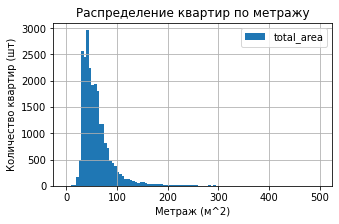

In [23]:
#изучим общую площадь
ax=df.plot(y='total_area', kind='hist', bins=100, grid=True, figsize=(5,3), range=(0,500))
#  Добавляем название графика и подписи к осям
ax.set_title('Распределение квартир по метражу')
ax.set_xlabel('Метраж (м^2)')
ax.set_ylabel('Количество квартир (шт)')
df['total_area'].describe()

Распределение данных нормальное, есть выбросы но они не сильно влияют на данные, 
по гистограмме кроме распределения нечего больше указать, с помошью describe получил общее представление

count    2.361200e+04
mean     6.540413e+06
std      1.090193e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

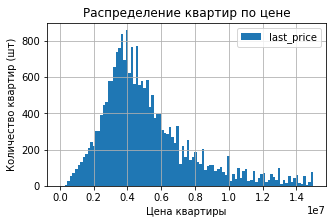

In [24]:
#изучим цену
ax=df.plot(y='last_price', kind='hist', bins=100, grid=True, range=(0,15000000), figsize=(5,3))
#  Добавляем название графика и подписи к осям
ax.set_title('Распределение квартир по цене')
ax.set_xlabel('Цена квартиры')
ax.set_ylabel('Количество квартир (шт)')
df['last_price'].describe()

с данными все впорядке, но значения выводятся в экспоненциальной записи чисел

count    23612.000000
mean         2.071108
std          1.078386
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

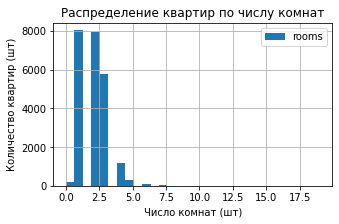

In [25]:
#изучим число комнат
ax = df.plot(y='rooms', kind='hist', bins=30, grid=True, figsize=(5,3))
#  Добавляем название графика и подписи к осям
ax.set_title('Распределение квартир по числу комнат')
ax.set_xlabel('Число комнат (шт)')
ax.set_ylabel('Количество квартир (шт)')
df['rooms'].describe()

с данными все впорядке

count    23612.000000
mean         2.747810
std          0.995111
min          1.000000
25%          2.600000
50%          2.600000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

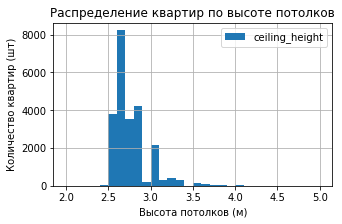

In [26]:
#изучим высоту потолков
ax = df.plot(y='ceiling_height', kind='hist', bins=30, range=(2,5), grid=True, figsize=(5,3))
#  Добавляем название графика и подписи к осям
ax.set_title('Распределение квартир по высоте потолков')
ax.set_xlabel('Высота потолков (м)')
ax.set_ylabel('Количество квартир (шт)')

df['ceiling_height'].describe()

с данными все впорядке

**Вывод:**

* Общая площадь в нашей выборке колеблется от 12 до 900 м2, среднее значение 60, а медиана 52 м2. Распределение данных Гаусса.

* Цены на недвижимость имеют среднее значение в 6,5 млн руб., медиана 4,6 млн руб. Распределение данных Гаусса.

* Количество комнат колеблется от 1 до 19. Больше всего однокомнатных квартир.

* Высота потолков в среднем составляет 2,77 м, медиана 2,65 м.

Во всех данных есть неадекватные значения, наподобие 0 комнат, высоты потолков в 1 или 100 метров, а также цены квартиры в 12190 рублей.

### Задача 2
Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. Ответим на вопрос: "Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"

Прежде чем начать сделаем предположение, что дата снятия объявления может не считаться датой продажи, причем в непонятном для нас количестве случаев.

In [27]:
print(df.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_square_meter',
       'weekday_exposition', 'month_exposition', 'year_exposition',
       'floor_category', 'useful_area_ratio', 'kitchen_area_ratio'],
      dtype='object')


<AxesSubplot:>

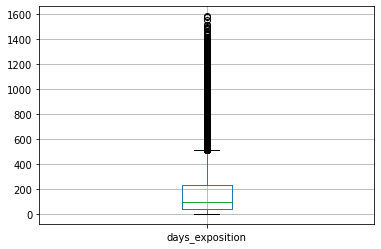

In [28]:
#диаграмма размаха
df.boxplot(column='days_exposition')

<AxesSubplot:ylabel='Frequency'>

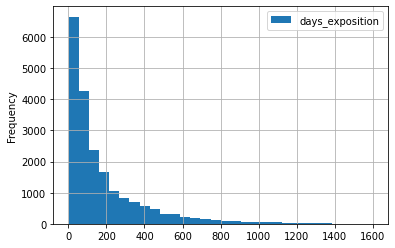

In [29]:
#гистограммы
df.plot(y='days_exposition', kind='hist', bins=30, grid=True, range=(1,1600))

<AxesSubplot:ylabel='Frequency'>

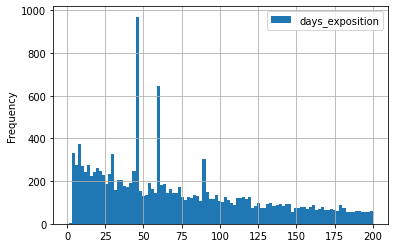

In [30]:
df.plot(y='days_exposition', kind='hist', bins=100, grid=True, range=(1,200))

In [31]:
#среднее значение, медиана и межквартильный размах
df[df['days_exposition']!=0]['days_exposition'].describe()

count    20440.000000
mean       180.891096
std        219.689096
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [32]:
df[df['days_exposition']!=0]['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      201
         ... 
1349.0      1
1084.0      1
1050.0      1
1228.0      1
1174.0      1
Name: days_exposition, Length: 1139, dtype: int64

**Вывод:** судя по гистограмме - мы имеем распределение Пуассона. Среднее значение - 180 дней, а медиана - 95 дней. 
Сделав гистограмму со значениями от 0 до 200 с кол-вом корзин 100, обнаружили выбивающиеся значения и методом value_counts убедились в этом - у нас аномалии на 45, 60, 7, 30, 90 днях - это наиболее популярное количество дней до снятия объявления.

In [33]:
df[df['days_exposition']==45]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio
78,9,4350000,37.0,2018-02-22,1,2.8,19,18.0,6,True,...,0.0,NaN,45.0,117567,4 - четверг,2,2018,другой,0.486486,0.289189
89,9,2500000,63.0,2018-10-25,3,2.5,5,43.0,4,True,...,NaN,NaN,45.0,39682,4 - четверг,10,2018,другой,0.682540,0.142857
110,6,3850000,72.3,2017-09-29,2,2.8,3,27.4,2,True,...,NaN,NaN,45.0,53250,5 - пятница,9,2017,другой,0.378976,0.326418
153,12,4350000,55.0,2017-05-21,2,2.6,9,31.2,2,True,...,0.0,NaN,45.0,79090,7 - воскресенье,5,2017,другой,0.567273,0.150909
158,15,3100000,47.3,2017-11-07,2,2.6,5,27.5,2,True,...,NaN,NaN,45.0,65539,2 - вторник,11,2017,другой,0.581395,0.179704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23601,10,2900000,43.4,2018-01-11,2,2.6,5,NaN,1,True,...,2.0,397.0,45.0,66820,4 - четверг,1,2018,первый,NaN,NaN
23613,4,3950000,52.0,2018-03-04,3,2.6,5,NaN,2,True,...,0.0,NaN,45.0,75961,7 - воскресенье,3,2018,другой,NaN,NaN
23670,9,2450000,45.6,2018-02-08,1,2.8,9,NaN,2,True,...,NaN,NaN,45.0,53728,4 - четверг,2,2018,другой,NaN,NaN
23679,0,2500000,35.0,2017-12-08,1,2.6,9,NaN,4,True,...,NaN,NaN,45.0,71428,5 - пятница,12,2017,другой,NaN,NaN


**Вывод:** никаких общих особенностей в обьявлениях, снятых через 45 дней не выявлено, потому будем убирать эти данные из наших расчетов, как и данные с 60, 90, 30 и 7 дней в столбце days_exposition, так как это аномалии.

До того, как мы очистим наши данные от аномалий, нам нужно дать ответ на вопрос, какое количество дней считать нормальным, а какое выбросом на текущий момент до очистки данных. Исходя из метода describe, межквартильный размах - от 45 до 232 дней, исходя же из метода boxplot - диаграмма размаха у нас от минимального значения до примерно 500 дней. Значит необоснованно быстрых значений у нас нет, а необоснованно долгие - от 500 дней и выше. Значит нормальные значения у нас лежат от 1 до 500.

### Задача 3
Уберём редкие и выбивающиеся значения. Опишем, какие особенности обнаружили.

Для начала определим выбросы по каждому из набора данных

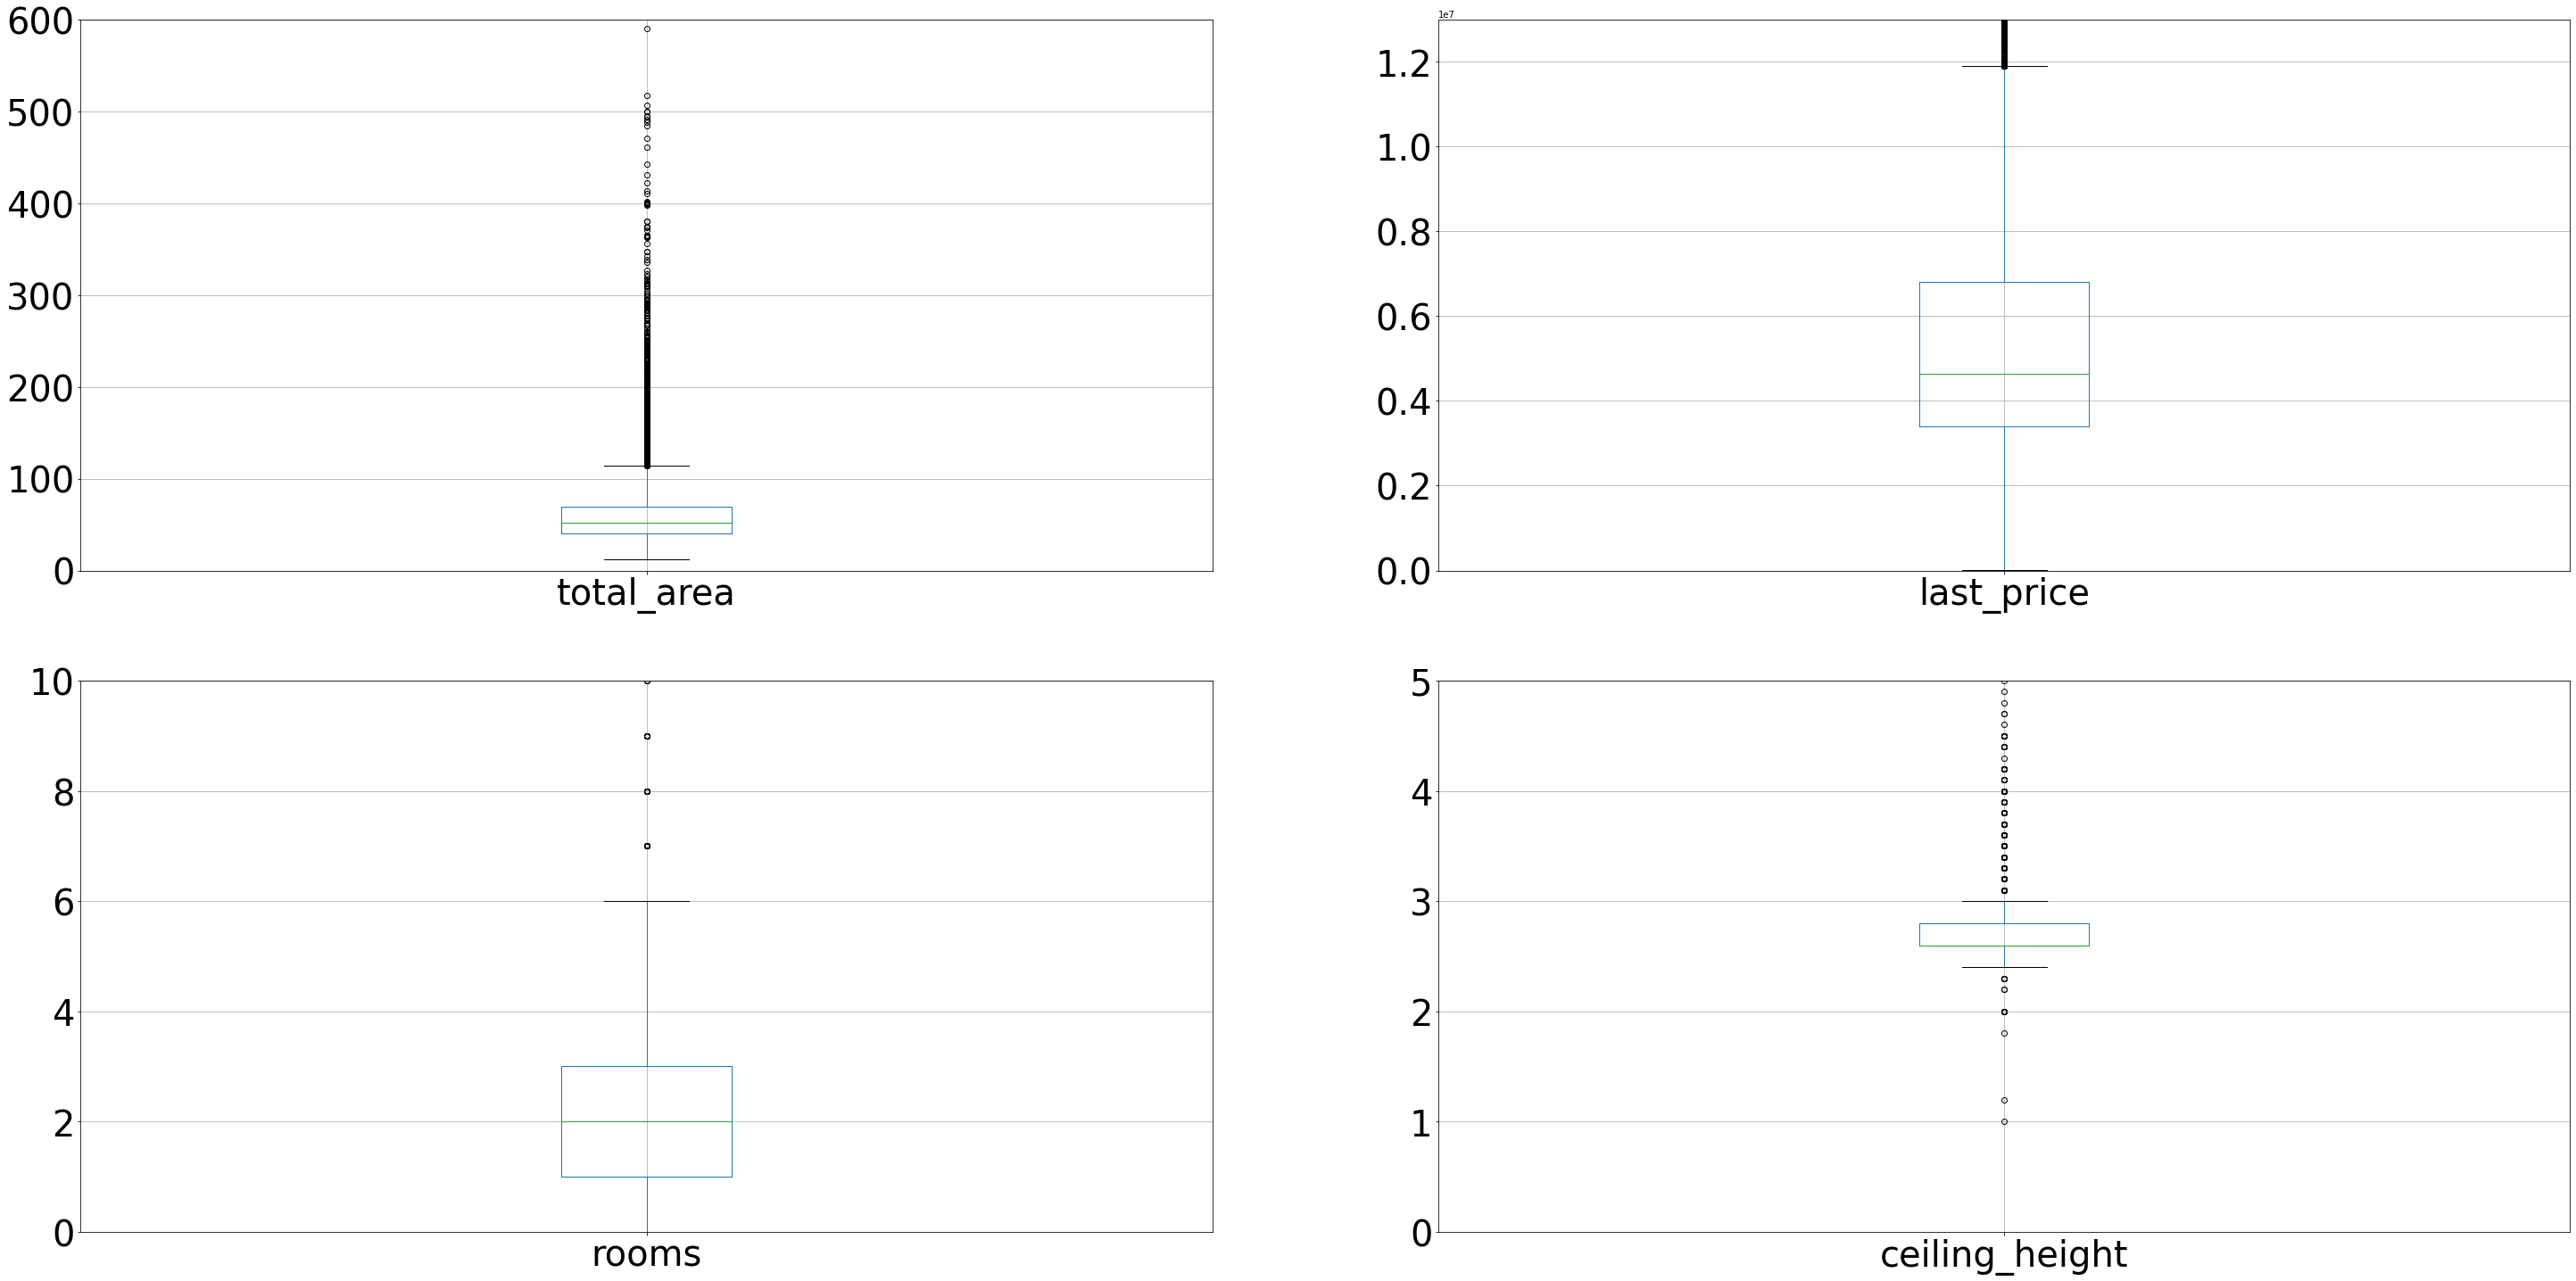

In [34]:
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(50,25))
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
ylims = [600, 13000000, 10, 5]
count = 0
for r in range(rows):
    for c in range(cols):
        ax = df.boxplot(column=column_list[count], ax=axes[r,c], fontsize=40)
        ax.set_ylim([0, ylims[count]])
        count += 1

In [35]:
#отфильтруем данные от аномалий и запишем их в новый датафрейм good_data
good_data = df.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != 0 and total_area >=20 and total_area <= 100 and last_price >=1000000 and last_price <=13000000 and rooms != 0 and rooms <= 6 and ceiling_height >=1.5 and ceiling_height <= 4')

In [36]:
# good_data = df.query('total_area != 0 and total_area <= 60 and last_price !=0 and last_price <=6500000 and rooms != 0 and rooms <= 4 ceiling_height > 1.5 and ceiling_height <= 3')

Посмотрим на новый датафрейм без выбросов

In [37]:
good_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio
1,7,3350000,40.4,2018-12-04,1,2.8,11,18.6,1,True,...,0.0,NaN,81.0,82920,2 - вторник,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,True,...,2.0,574.0,558.0,92785,4 - четверг,8,2015,другой,0.612500,0.148214
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,True,...,1.0,48.0,121.0,100000,2 - вторник,6,2018,другой,0.320000,0.410000
5,10,2890000,30.4,2018-09-10,1,2.6,12,14.4,5,True,...,NaN,NaN,55.0,95065,1 - понедельник,9,2018,другой,0.473684,0.299342
6,6,3700000,37.3,2017-11-02,1,2.7,26,10.6,6,True,...,0.0,NaN,155.0,99195,4 - четверг,11,2017,другой,0.284182,0.386059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000,30.0,2017-07-07,1,2.6,5,17.5,4,True,...,NaN,NaN,413.0,45000,5 - пятница,7,2017,другой,0.583333,0.200000
23693,9,4600000,62.4,2016-08-05,3,2.6,9,40.0,8,True,...,1.0,675.0,239.0,73717,5 - пятница,8,2016,другой,0.641026,0.128205
23696,18,2500000,56.7,2018-02-11,2,2.8,3,29.7,1,True,...,NaN,NaN,NaN,44091,7 - воскресенье,2,2018,первый,0.523810,NaN
23697,13,11475000,76.8,2017-03-28,2,3.0,17,NaN,12,True,...,3.0,196.0,602.0,149414,2 - вторник,3,2017,другой,NaN,0.303385


In [38]:
# good_data = df.query('last_price !=0 and last_price <=6500000')

In [39]:
# good_data = df.query('rooms != 0 and rooms <= 4')

In [40]:
# good_data = df.query('ceiling_height > 1.5 and ceiling_height <= 3')

In [41]:
good_data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,19021.000000,1.902100e+04,19021.000000,19021.000000
mean,52.744493,4.922415e+06,1.923611,2.690164
std,16.962054,2.244386e+06,0.857576,0.188171
min,20.000000,1.000000e+06,1.000000,1.800000
25%,39.200000,3.400000e+06,1.000000,2.600000
50%,49.700000,4.490000e+06,2.000000,2.600000
75%,63.400000,6.000000e+06,3.000000,2.800000
max,100.000000,1.300000e+07,6.000000,4.000000


In [42]:
good_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio
1,7,3350000,40.4,2018-12-04,1,2.8,11,18.6,1,True,...,0.0,NaN,81.0,82920,2 - вторник,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,True,...,2.0,574.0,558.0,92785,4 - четверг,8,2015,другой,0.612500,0.148214
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,True,...,1.0,48.0,121.0,100000,2 - вторник,6,2018,другой,0.320000,0.410000
5,10,2890000,30.4,2018-09-10,1,2.6,12,14.4,5,True,...,NaN,NaN,55.0,95065,1 - понедельник,9,2018,другой,0.473684,0.299342
6,6,3700000,37.3,2017-11-02,1,2.7,26,10.6,6,True,...,0.0,NaN,155.0,99195,4 - четверг,11,2017,другой,0.284182,0.386059
7,5,7915000,71.6,2019-04-18,2,2.8,24,NaN,22,True,...,0.0,NaN,NaN,110544,4 - четверг,4,2019,другой,NaN,0.263966
8,20,2900000,33.2,2018-05-23,1,2.7,27,15.4,26,True,...,NaN,NaN,189.0,87349,3 - среда,5,2018,другой,0.463855,0.265060
9,18,5400000,61.0,2017-02-26,3,2.5,9,43.6,7,True,...,0.0,NaN,289.0,88524,7 - воскресенье,2,2017,другой,0.714754,0.106557
10,5,5050000,39.6,2017-11-16,1,2.7,12,20.3,3,True,...,2.0,553.0,137.0,127525,4 - четверг,11,2017,другой,0.512626,0.214646
13,20,3550000,42.8,2017-07-01,2,2.6,5,27.0,5,True,...,3.0,298.0,366.0,82943,6 - суббота,7,2017,последний,0.630841,0.121495


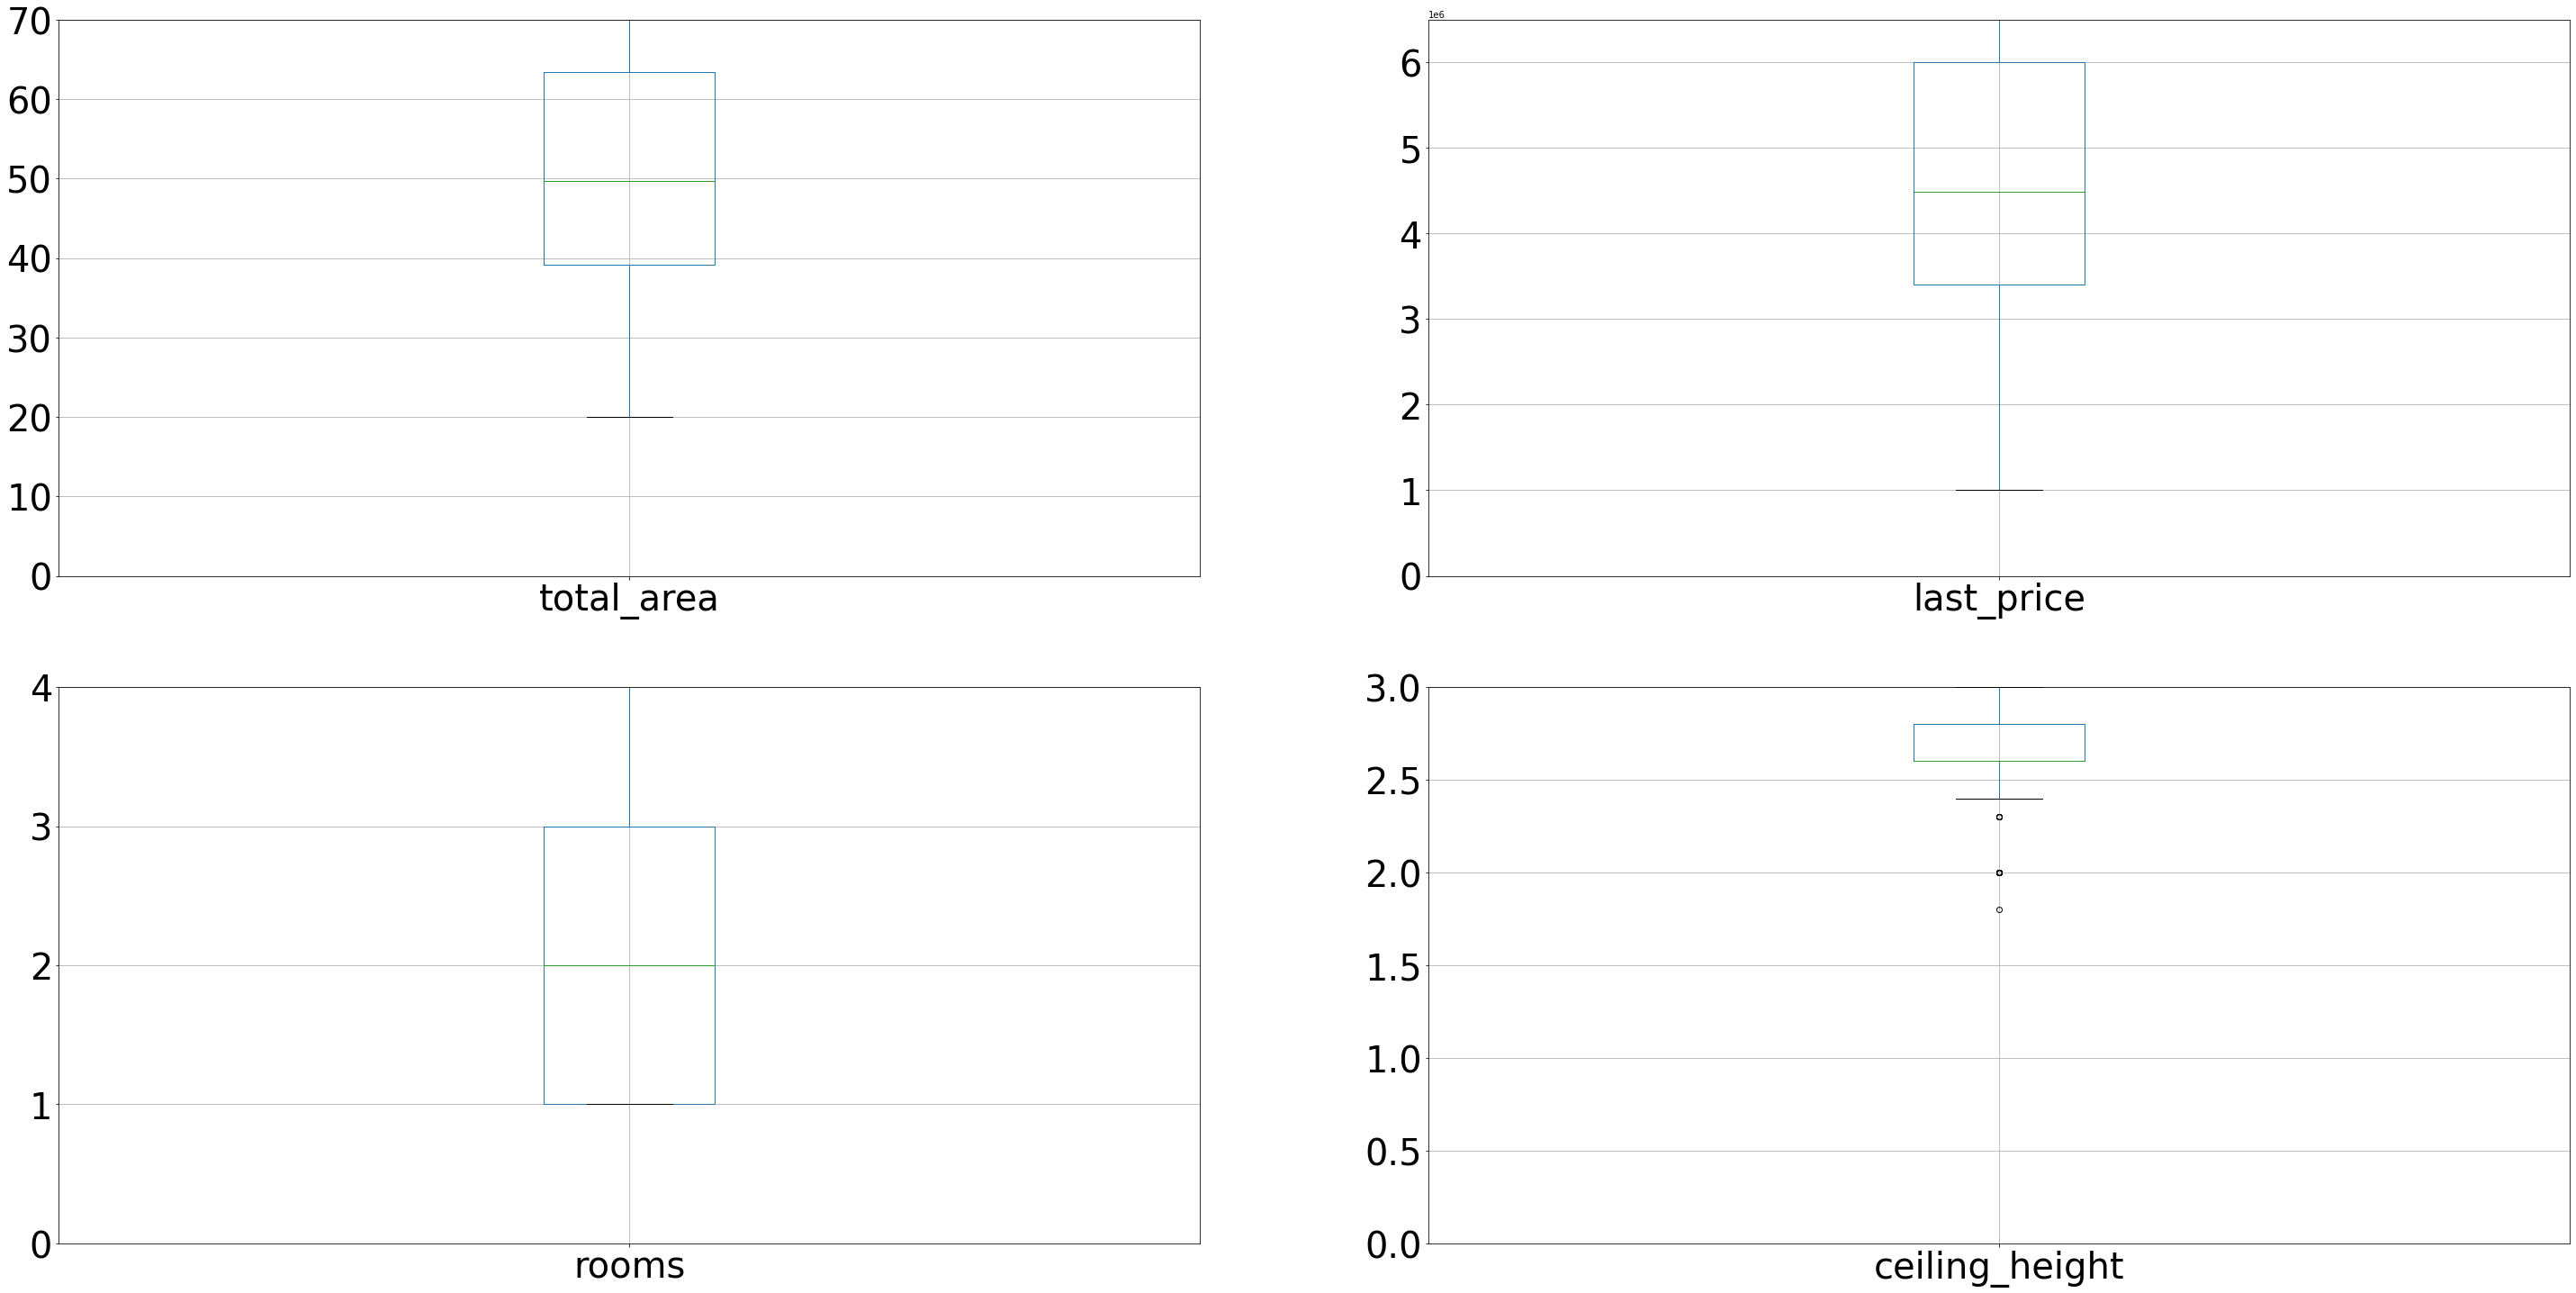

In [43]:
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(50,25))
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
ylims = [70, 6500000, 4, 3]
count = 0
for r in range(rows):
    for c in range(cols):
        ax = good_data.boxplot(column=column_list[count], ax=axes[r,c], fontsize=40)
        ax.set_ylim([0, ylims[count]])
        count += 1

<AxesSubplot:>

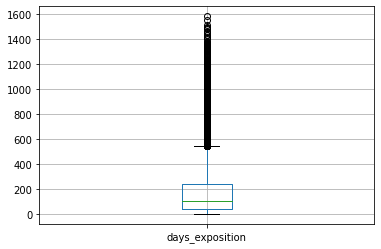

In [44]:
#диаграмма размаха
good_data.boxplot(column='days_exposition')

<AxesSubplot:ylabel='Frequency'>

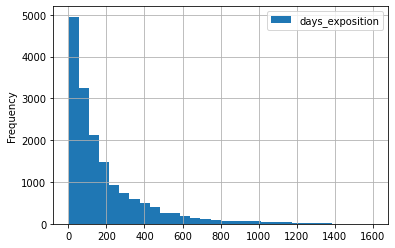

In [45]:
#гистограммы
good_data.plot(y='days_exposition', kind='hist', bins=30, grid=True, range=(1,1600))

<AxesSubplot:ylabel='Frequency'>

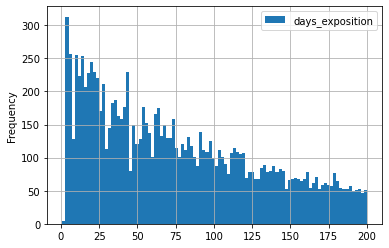

In [46]:
good_data.plot(y='days_exposition', kind='hist', bins=100, grid=True, range=(1,200))

In [47]:
#среднее значение, медиана и межквартильный размах
#good_data['days_exposition'].value_counts()
good_data['days_exposition'].describe()

count    16477.000000
mean       186.540936
std        217.566491
min          1.000000
25%         43.000000
50%        108.000000
75%        243.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Вывод**: в очищенных данных с аномалиями в значениях меньших медианы получаем значения медианы и среднего значения - 108 и 186 соответственно, вместо 95 и 180.

### Задача 4
Узнаем какие факторы больше всего влияют на стоимость квартиры: 
* Изучим, зависит ли цена от общей площади квартиры, числа комнат, этажа (первого или последнего), удалённости от центра. 
* Также изучим зависимость от даты размещения: дня недели, месяца и года.

**Изучим зависимость цены от общей площади квартиры.**

<AxesSubplot:xlabel='total_area'>

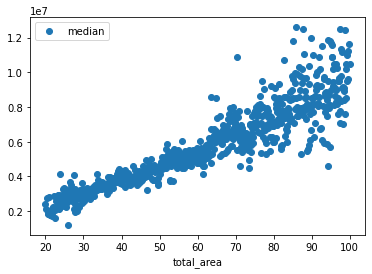

In [48]:
pivot_table_total_area = good_data.pivot_table(
    index='total_area', 
    values='last_price', 
    aggfunc = ['mean', 'count', 'median']
)
pivot_table_total_area.columns=['mean', 'count', 'median']
pivot_table_total_area.plot(y='median', style='o')

In [49]:
pivot_table_total_area.sort_values('median', ascending = False)

,mean,count,median
total_area,,,
85.9,1.260000e+07,1,12600000.0
97.4,1.250000e+07,1,12500000.0
87.8,1.155667e+07,3,12490000.0
98.7,1.245000e+07,2,12450000.0
89.9,1.100000e+07,3,12000000.0
...,...,...,...
21.4,2.493333e+06,3,1800000.0
21.1,1.750000e+06,1,1750000.0
21.7,1.740000e+06,1,1740000.0


In [50]:
good_data['total_area'].corr(df['last_price'])

0.6946064660520241

**Вывод:** видим, что зависимость согласно корреляции Пирсона - 0.7! То есть, чем больше площадь тем выше стоимость!

**Изучим зависимость цены от числа комнат.**

,mean,count,median
rooms,,,
4,6.424613e+06,548,6385000
3,6.126278e+06,4473,5750000
2,5.164954e+06,6844,4743000
1,3.810421e+06,7123,3600000


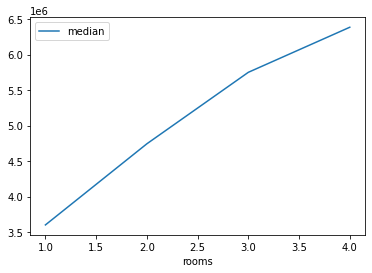

In [51]:
pivot_table_rooms=good_data.pivot_table(index='rooms', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')

pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)

In [52]:
good_data['rooms'].corr(df['last_price'])

0.4128365711603645

**Вывод:** чем больше количество комнат тем выше стоимость квартиры. 

**Изучим зависимость цены от этажа (первого или последнего).**

,mean,count,median
floor_category,,,
другой,5.107126e+06,13992,4600000
первый,4.228569e+06,2440,3900000
последний,4.578076e+06,2589,4100000


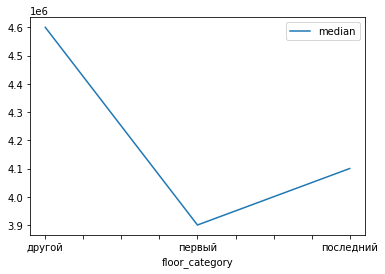

In [53]:
pivot_table_floor_category = good_data.pivot_table(
        index='floor_category', 
        values='last_price',
        aggfunc=['mean', 'count', 'median']
    )
pivot_table_floor_category.columns=['mean', 'count', 'median']
pivot_table_floor_category.plot(y='median')
pivot_table_floor_category

**Вывод:** На первом этаже самые дешевые квартиры, дороже на последнем, самые дорогие - между ними

**Изучим зависимость цены от удалённости от центра.**

-0.3481933469391332

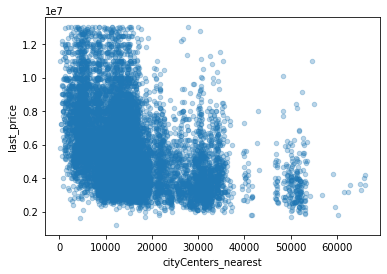

In [54]:
good_data.plot(kind = 'scatter', y = 'last_price', x = 'cityCenters_nearest', alpha = 0.3)

good_data['cityCenters_nearest'].corr(df['last_price'])

**Вывод:** видим явную зависимость стоимости квартиры от близости к центру! Чем ближе к центру, тем выше стоимость!

<AxesSubplot:xlabel='weekday_exposition'>

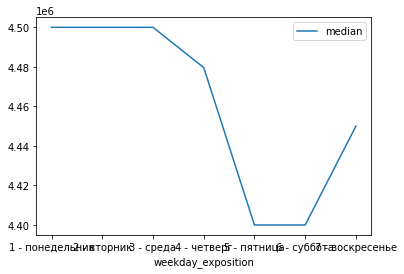

In [55]:
pivot_table_weekday_exposition = good_data.pivot_table(index='weekday_exposition', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y='median')

In [56]:
pivot_table_weekday_exposition.sort_values('median', ascending = False)

,mean,count,median
weekday_exposition,,,
1 - понедельник,4.915141e+06,2926,4500000
2 - вторник,4.955978e+06,3366,4500000
3 - среда,4.960315e+06,3153,4500000
4 - четверг,4.955056e+06,3430,4479650
7 - воскресенье,4.894926e+06,1355,4450000
5 - пятница,4.880217e+06,3250,4400000
6 - суббота,4.825885e+06,1541,4400000


**Вывод:** Самая высокая стоимость в понедельник - среду и к выходным падает

**Изучим зависимость цены от даты размещения: месяца.**

<AxesSubplot:xlabel='month_exposition'>

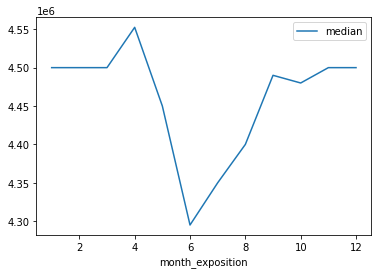

In [57]:
pivot_table_month_exposition=good_data.pivot_table(index='month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y='median')

In [58]:
pivot_table_month_exposition.sort_values('median', ascending = False)

,mean,count,median
month_exposition,,,
4,4.992867e+06,2002,4552500
1,4.944079e+06,1161,4500000
2,4.942042e+06,2083,4500000
3,4.899891e+06,2112,4500000
11,4.930608e+06,1911,4500000
12,4.958484e+06,1267,4500000
9,4.976423e+06,1567,4490000
10,4.914810e+06,1761,4480000
5,4.932068e+06,1028,4450000


**Вывод:** самая высокая стоимость метра в апреле. Самая низкая стоимость в мае и июне! На рынке недвижимости, как и во многих других сферах присутствует сезонность - в начале лета мы видим наименьшее предложение как по количеству, так и по стоимости недвижимости. Наверное, это связано с отпусками.

**Изучим зависимость цены от даты размещения: года.**

<AxesSubplot:xlabel='year_exposition'>

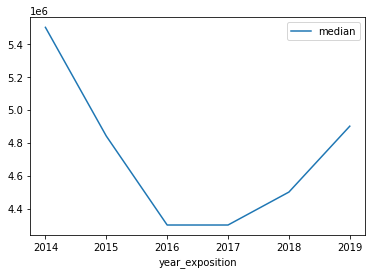

In [59]:
pivot_table_year_exposition = good_data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns=['mean', 'count', 'median']
pivot_table_year_exposition.plot(y='median')

In [60]:
pivot_table_year_exposition.sort_values('median', ascending = False)

,mean,count,median
year_exposition,,,
2014,5.947751e+06,89,5500000
2019,5.241939e+06,2413,4900000
2015,5.203282e+06,966,4840000
2018,4.897860e+06,6661,4500000
2016,4.834544e+06,2306,4300000
2017,4.805897e+06,6586,4300000


**Вывод:** видим, что с 2014 до 2016 года цена падала, но далее начала увеличиваться.

### Задача 5
Выберем 10 населённых пунктов с наибольшим числом объявлений:
* Посчитаем среднюю цену квадратного метра в этих населённых пунктах. 
* Выделим населённые пункты с самой высокой и низкой стоимостью жилья. 

In [61]:
locality_pivot_table = good_data.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns=['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table

,count,mean
locality_name,,
Санкт-Петербург,12336,106595.605058
посёлок Мурино,450,84935.122222
посёлок Шушары,378,78632.933862
Всеволожск,353,66982.730878
Пушкин,312,101140.945513
Колпино,297,75632.663300
посёлок Парголово,281,90815.128114
Гатчина,271,68442.889299
деревня Кудрово,249,91833.000000


In [62]:
#самая высокая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,12336,106595.605058


In [63]:
#самая низкая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]

,count,mean
locality_name,,
Выборг,188,58878.297872


**Вывод:** самая высокая стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге, тогда как самая низкая стоимость в Выборге.

### Задача 6
Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 
Выделим квартиры в Санкт-Петербурге ('locality_name'). 
Необходимо выяснить, какая область входит в центр. 

* Создадим столбец с расстоянием до центра в километрах: округлите до целых значений. 
* Посчитаем среднюю цену для каждого километра. 
* Построим график: он должен показывать, как цена зависит от удалённости от центра. 
* Определим границу, где график сильно меняется — это и будет центральная зона.

In [64]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].fillna(999999)
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].astype('int')

/tmp/ipykernel_350/1137362368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data['cityCenters_nearest_km'] = df['cityCenters_nearest_km']


,last_price
cityCenters_nearest_km,
0,8500000
1,8200000
2,7600000
3,6994500
4,7500000
5,7290000
6,6600000
7,6450000
8,5815000


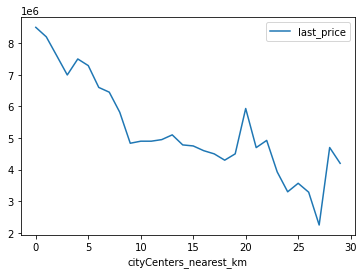

In [65]:
good_data['cityCenters_nearest_km'] = df['cityCenters_nearest_km']
pivot_table_km = good_data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=999999').pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc = 'median')
pivot_table_km.plot()
pivot_table_km.head(10)

**Вывод:** Ожидаемо, что в самом центре (в радиусе до 1 км) медианная цена на квартиру стремится к 9 млн р. Если опираться на резкое падение цены по графику, то центр ограничен радиусом в 8 км, далее медианная цена довольно заметно падает. 

### Задача 7
Выделим сегмент квартир в центре. 
Проанализируем эту территорию и изучим следующие параметры: 
* площадь, 
* цена, 
* число комнат, 
* высота потолков. 

Также выделим факторы, которые влияют на стоимость квартиры: 
* число комнат, 
* этаж, 
* удалённость от центра, 
* дата размещения объявления. 

Ответим на вопрос: "Отличаются ли они от общих выводов по всему городу?"

In [66]:
#выделим квартиры в центре, взяв за радиус 8 км
center_spb_data = good_data.query('cityCenters_nearest_km <= 8 and locality_name == "Санкт-Петербург"')
print('Выборка квартир в центре Санкт-Петербурга -', center_spb_data.shape[0], 'квартир')

Выборка квартир в центре Санкт-Петербурга - 2628 квартир


In [67]:
center_spb_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio,cityCenters_nearest_km
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,True,...,48.0,121.0,100000,2 - вторник,6,2018,другой,0.320000,0.410000,8
24,8,6500000,97.2,2015-10-31,2,2.8,3,46.5,1,True,...,124.0,265.0,66872,6 - суббота,10,2015,первый,0.478395,0.201646,2
61,18,7990000,74.0,2017-08-24,2,3.0,4,43.0,4,True,...,NaN,609.0,107972,4 - четверг,8,2017,последний,0.581081,0.270270,4
70,9,3400000,30.0,2018-09-05,1,2.6,5,16.0,1,True,...,NaN,14.0,113333,3 - среда,9,2018,первый,0.533333,0.233333,8
94,3,3500000,29.5,2019-04-26,1,2.5,5,15.6,2,True,...,NaN,4.0,118644,5 - пятница,4,2019,другой,0.528814,0.186441,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23648,14,10100000,78.0,2017-05-12,3,3.3,5,48.6,5,True,...,117.0,621.0,129487,5 - пятница,5,2017,последний,0.623077,0.105128,1
23665,11,4250000,47.0,2016-05-20,1,3.0,6,18.2,1,False,...,519.0,131.0,90425,5 - пятница,5,2016,первый,0.387234,0.310638,4
23681,13,5250000,43.0,2018-05-11,2,2.5,5,29.0,2,True,...,660.0,80.0,122093,5 - пятница,5,2018,другой,0.674419,0.139535,7
23690,3,5500000,52.0,2018-07-19,2,2.6,5,31.0,2,True,...,NaN,15.0,105769,4 - четверг,7,2018,другой,0.596154,0.115385,6


<AxesSubplot:ylabel='Frequency'>

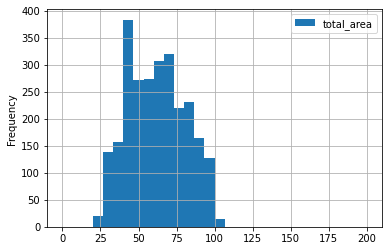

In [68]:
center_spb_data.plot(y='total_area', kind='hist', bins=30, grid=True, range=(0,200))

В центре много больших квартир от 45 до 100 кв.м.

<AxesSubplot:ylabel='Frequency'>

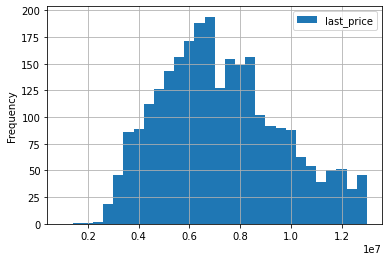

In [69]:
center_spb_data.plot(y='last_price', kind='hist', bins=30, grid=True, range=(1000000,13000000))

Стоимость этих квартир в среднем выше. В центре стоимость в среднем в райне 6.5 млн.

<AxesSubplot:ylabel='Frequency'>

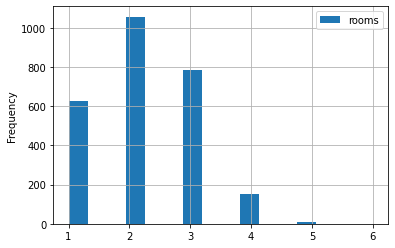

In [70]:
center_spb_data.plot(y='rooms', kind='hist', bins=16, grid=True, range=(1,6) )

В центре больше всего квартир с 2-3 комнатами.

<AxesSubplot:ylabel='Frequency'>

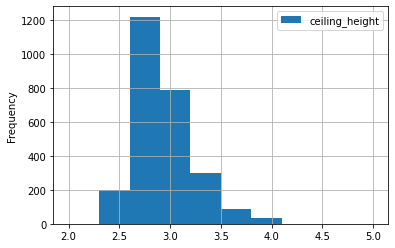

In [71]:
center_spb_data.plot(y='ceiling_height', kind='hist', bins=10,grid=True, range=(2,5))

Самая популярная высота потолка 2.7 м, и также много квартир с высотой до 3 м.

**Зависимость стоимости от количества комнат.**

,mean,count,median
rooms,,,
4,8.597613e+06,150,8425000
3,8.214292e+06,785,8000000
2,7.227829e+06,1056,6815000
1,5.677494e+06,628,5600000


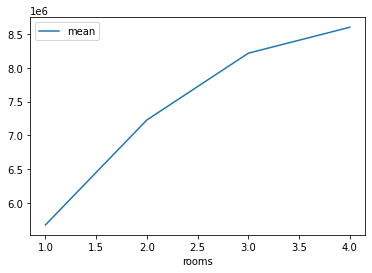

In [72]:
center_spb_rooms = center_spb_data.pivot_table(index='rooms', values='last_price', aggfunc=['mean', 'count', 'median'])
center_spb_rooms.columns = ['mean', 'count', 'median']
center_spb_rooms.query('count > 50').plot(y ='mean')

center_spb_rooms.query('count > 50').sort_values('median', ascending = False)

**Вывод:** Чем больше комнат, тем выше цена. В центре всё просто.

**Зависимость стоимости от этажа.**

,mean,count,median
floor_category,,,
другой,7.449414e+06,1854,7229500.0
первый,6.098387e+06,350,5886269.5
последний,7.249706e+06,424,6985000.0


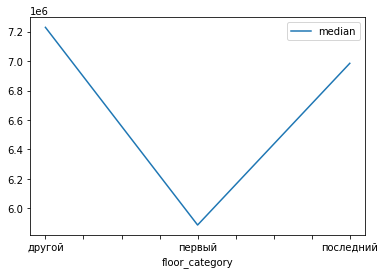

In [73]:
center_spb_floor_category=center_spb_data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
center_spb_floor_category.columns=['mean', 'count', 'median']
center_spb_floor_category.plot(y='median')
center_spb_floor_category

**Вывод:** Квартиры на первом этаже дешевле. Остальные - самые дорогие.

**Зависимость стоимости от удаленности от центра.**

-0.19438277608975843

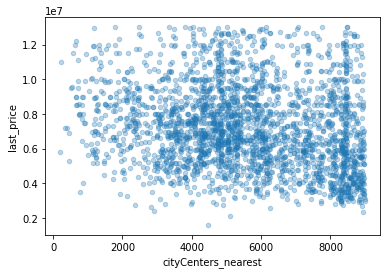

In [74]:
center_spb_data.plot(kind='scatter', y='last_price', x='cityCenters_nearest', alpha=0.3)

center_spb_data['cityCenters_nearest'].corr(center_spb_data['last_price'])

**Вывод:** Учитывая, что мы уже находимся в центре, цена квартиры почти не зависит от расположения

**Зависимость цены от дня недели размещения объявления.**

,mean,count,median
weekday_exposition,,,
7 - воскресенье,7.583884e+06,152,7525000
1 - понедельник,7.285673e+06,388,7000000
3 - среда,7.333243e+06,442,7000000
4 - четверг,7.255083e+06,541,6980000
5 - пятница,7.232230e+06,441,6900000
6 - суббота,7.109380e+06,207,6875055
2 - вторник,7.029726e+06,457,6800000


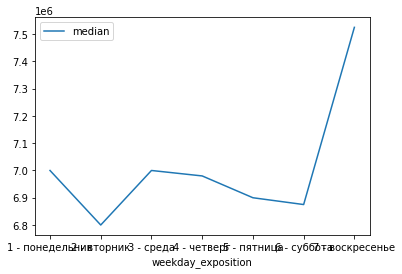

In [75]:
center_spb_weekday_exposition=center_spb_data.pivot_table(index='weekday_exposition', values='last_price', aggfunc=['mean', 'count', 'median'])
center_spb_weekday_exposition.columns=['mean', 'count', 'median']
center_spb_weekday_exposition.plot(y='median')

center_spb_weekday_exposition.sort_values('median', ascending = False)

**Вывод:** ситуация отличается от всей выборки, минимальные средние цены во вторник и субботу, самые высокие - в воскресенье.

**Зависимость цены от месяца размещения объявления.**

,mean,count,median
month_exposition,,,
9,7.577117e+06,235,7400000
3,7.341393e+06,283,7100000
7,7.263077e+06,188,7050000
8,7.267943e+06,206,7009000
1,7.379514e+06,157,7000000
4,7.191665e+06,261,7000000
5,7.463138e+06,171,7000000
6,6.855310e+06,205,6850000
11,7.255171e+06,236,6825000


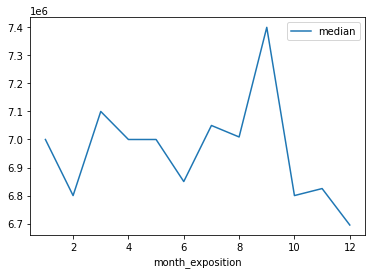

In [76]:
center_spb_month_exposition=center_spb_data.pivot_table(index='month_exposition', values='last_price', aggfunc=['mean', 'count', 'median'])
center_spb_month_exposition.columns=['mean', 'count', 'median']
center_spb_month_exposition.plot(y='median')
  
center_spb_month_exposition.sort_values('median', ascending = False)

**Вывод:**  Самая низкая стоимость зимой. Самая высокая осенью

**Зависимость стоимости от года размещения объявления.**

,mean,count,median
year_exposition,,,
2019,7.521371e+06,296,7490000
2015,7.488861e+06,212,7184630
2016,7.301672e+06,354,6999500
2018,7.150097e+06,828,6874500
2017,7.125999e+06,923,6830000


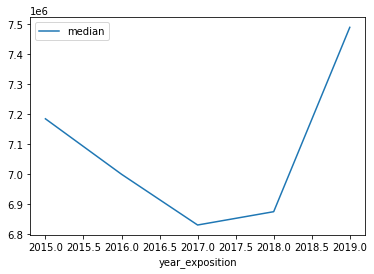

In [77]:
center_spb_year_exposition=center_spb_data.pivot_table(index='year_exposition', values='last_price', aggfunc=['mean', 'count', 'median'])
center_spb_year_exposition.columns=['mean', 'count', 'median']
center_spb_year_exposition.query('count > 50').plot(y='median')

center_spb_year_exposition.query('count > 50').sort_values('median', ascending = False)

**Вывод:** в центре СПБ в 2016-2017 годах так же падали, как и во всей выборке, а после 2018 начали расти.

Воспользуемся функцией corr() и посмотрим, как влияют определенные параметры квартиры на её финальную цену. Выделим только столбец last_price, чтоб детальней рассмотреть влияние различных параметров именно на цену:

<AxesSubplot:>

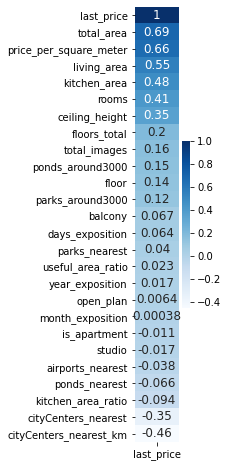

In [78]:
plt.figure(figsize=(1,8))
sns.heatmap(good_data.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap="Blues", 
            annot=True, annot_kws={'size':12})

Из данных выше, мы можем сказать, что **сильнее всего** цена на квартиру зависит:
* от цены за квадратный метр (практически очевидно), 
* от общей площади квартиры (чем больше площадь, тем выше цена), 
* от площади жилой площади и площади кухни, 
* от количества комнат. 

Небольшое влияние оказывает присутствие парков/водоемов рядом.
Также влияние оказывает удаленность от центра - чем дальше от центра, тем ниже цена. Ожидаемо. Таким же образом небольшое влияние оказывает удаленность от аэропорта.
Многие из этих параметров оказывают довольно слабое влияние.

## Общий вывод

**Для корректности и удобства проведения исследовательского анализа были выполнены следующие шаги:** 
* обработаны полученный данных - обработали пропущенные значения там, где это необходимо, 
* заменены типы данных на необходимые для удобной работы. 
* проверено наличие дубликатов
* посчитаны и добавлены в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир. 
* изучены следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. 


**Выявленные зависимости:**
* **Метраж** - чем больше площадь квартиры, тем выше цена.
* **Цена за квадратный метр** - чем больше цена за квадратный метр, тем выше цена
* **Доля жилой площади/кухни** - чем выше доля жилой площади/площадь кухни, тем выше цена
* **Количество комнат** - чем больше комнат, тем выше цена
* **Этаж** - на первом этаже квартира дешевле, чем на остальных; на последнем дороже, чем на первом, но дешевле чем на остальных
* **Удаленность от центра** - чем ближе к центру, тем дороже квартира. В самом центре (< 1 км до центра) квартиры стоят на порядок дороже, чем на более удаленных.
* **День размещения объявления** - квартиры, размещенные к продаже в будние дни, в среднем дороже, чем размещенные в выходные.
* **Месяц размещения объявления** - квартиры, размещенные к продаже в летние месяцы и в октябре, в среднем дешевле, чем размещенные в любые другие месяца. В начале и в конце года цены стабильные и высокие.
* **Год размещения объявления** -  квартиры, размещенные к продаже в 2014 году, дороже всех. Период 2015-2018 - период низких цен на квартиры. 2019г. -  цены пошли вверх.

## Чек-лист готовности проекта

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод